In [78]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [79]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

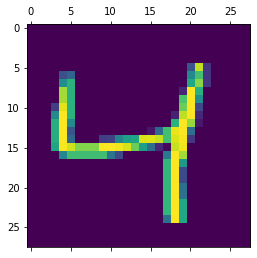

In [80]:
plt.matshow(x_train[2])

In [81]:
#convert 28*28 pixel image
def preprocess(dataset):
    dataset = (dataset - np.mean(dataset))/255
    dataset = dataset.reshape(-1,28,28,1)
    return dataset
x_train = preprocess(x_train)
x_test = preprocess(x_test)

In [82]:
from keras.layers import Dense, Activation
from keras import Sequential,Model
from keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input

### one-hot vectors are used for multiclass classification. In one-hot vectors, only one bit would be set which corresponds to the correct category it belongs to. Rest are zero.

In [83]:
def onehot(labels):
    return np.array([[float(i==data) for i in range(10)] for data in labels])
y_train = onehot(y_train)
y_test = onehot(y_test)

### The Model defined is a very simple one with two Convolutional Layers and two Dense layers. Dropout layers were used for regularization. Since there are 10 labels (0 to 9), the last layer has 10 output nodes. Softmax activation gives us the probabilities directly

In [84]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(padding = 'SAME'))
model.add(Conv2D(filters=32, kernel_size=5, padding='SAME', activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.25))
model.add(Flatten())

In [85]:
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [86]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        25632     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)          0         
                                                                 
 flatten_3 (Flatten)         (None, 1568)             

In [87]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, verbose=1, validation_data=(x_test, y_test))

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1873/1875 [============================>.] - ETA: 0s - loss: 0.1293 - accuracy: 0.9592WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002B3CEF5AEE0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but s

In [88]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0253 - accuracy: 0.9917


[0.025285406038165092, 0.9916999936103821]

In [89]:
y_pred=model.predict(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 2s 6ms/step


In [90]:
y_pred[0]

array([2.3190853e-04, 4.3181431e-02, 1.2846152e-01, 3.3175620e-01,
       6.4935029e-04, 1.7499684e-03, 1.4971020e-07, 9.9999714e-01,
       3.2150183e-02, 5.8458202e-02], dtype=float32)

In [91]:
np.argmax(y_pred[0])

7

1/1 [==============================] - 0s 28ms/step


[]

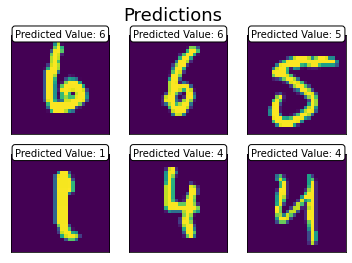

In [94]:
np.random.seed(3)
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols)
fig.suptitle("Predictions", size=18)
ec = (0, 0, 0)
fc = (1, 1, 1)
for i in range(n_rows):
    for j in range(n_cols):
        k = np.random.randint(0,6000)
        ax[i][j].imshow(x_test[k].reshape((28,28)))
        temp = np.argmax(model.predict(np.expand_dims(x_test[k], axis=0)))
        ax[i][j].text(s="Predicted Value: {}".format(temp), x=0.75, y=0,
                      bbox=dict(boxstyle="round", ec=ec, fc=fc))
plt.setp(ax, xticks=[], yticks=[])

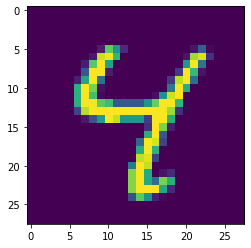

In [101]:
plt.imshow(x_test[6].reshape((28,28)))

## method 2